### Содержание

* [Вступление](#chapter0)
* [1. Изучение общей информации из файлов данных](#chapter1)
* [2. Подготовим данные](#chapter2)
    * [2.1 Обработаем пропуски](#section_2_1)
    * [2.2 Посчитаем суммарные продажи во всех регионах](#section_2_2)
* [3. Исследовательский анализ данных](#chapter3)    
    * [3.1 Проанализиуем распределение количества выпускаемых игр по годам](#section_3_1)
    * [3.2 Проанализируем изменение продаж по платформам.](#section_3_2)    
    * [3.3 Найдем какие платформы лидируют по продажам, растут или падают c 2014 по 2016](#section_3_3)
    * [3.4 График «ящик с усами» по глобальным продажам игр в разбивке по платформам](#section_3_4)
    * [3.5 Диграмма рессеивания и матрица корреляции.Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы(PS3)](#section_3_5)    
    * [3.6 Влияние отзывов пользователей и критиков на продажи для всех платформ](#section_3_6)  
    * [3.7 Общее распределение игр по жанрам, продажи](#section_3_7)    
* [4. Составим портрет пользователя каждого региона](#chapter4)
* [5. Проверка гипотез](#chapter5)
    * [Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#section_5_1)
    * [Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные](#section_5_2)
* [Общий вывод](#chapter6)    

# Вступление <a class="anchor" id="chapter0"></a>

   Проект выполняется для интернет-магазина «...», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). <br>
   <br>
   Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>
   <br>
   Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и планируется кампания на 2017-й. Нужно отработать принцип работы с данными. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st

## 1. Изучение общей информации из файлов данных <a class="anchor" id="chapter1"></a>

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод: <br> 
Данные содержат информацию по продажам игр с указанием названий игр, годом их выпуска, платформой, жанром и тд. <br>
Необходимо поработать с типами данных, так как многие типы не соответствуют содержанию. <br>
Кроме того, данные содержат много пропусков. <br>


##  2. Подготовим данные <a class="anchor" id="chapter2"></a>

In [ ]:
# Заменим названия столбцов (приведем к нижнему регистру)
data.columns = data.columns.str.lower()

# Преобразуем данные в нужные типы.
# Преобразуем year_of_release в integer так как содержит информацию только о годе выпуска, а не полную дату
data['year_of_release'] = data['year_of_release'].astype('Int64')
# Изменим для столбца user_score тип данных на float64
# так как столбец содержит tbd ячейки, заменим их на NaN, так как рейтинг пока не известен
data['user_score'] = data['user_score'].replace('tbd', None) 
# теперь можем изменить тип данных столбца
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')



### 2.1 Обработаем пропуски <a class="anchor" id="section_2_1"></a>

In [6]:
# Найдем пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         7955
rating             6766
dtype: int64

- Пропусков в именах всего два, возможно удалились по техническим причинам. Поработаем с ними ниже(пункт 2.3.1)
- Пропуски в оценках оставим NaN как есть, так как их нельзя взять у аналогичных игр. Пропуски в оценках возможно появились из-за малоизвестности игр и соответственно отсутствия оценок на официальных ресурсах.
- Аббревиатуру 'tbd' в столбце с оценкой пользователей уже изменили на NaN в предыдущем вычислении(см. пункт 2.2.2)
- Пропуски в year_of_release возможно появились из-за переноса выпуска игр, ниже поработаем с ними(пункт 2.3.2)

#### 2.1.1 Работа со строками без наименования игр

In [7]:
# Посмотрим внимательно на строки без наименования игр
display(data.query('name != name')) # выведем строки без имени игр, используя свойство NaN, что NaN != NaN
# эти строки практически не содержат информации, удалим их
data = data.dropna(subset = ['name']).reset_index(drop=True)
# проверим, что удалили все верно:
data.isna().sum()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         7953
rating             6764
dtype: int64

#### 2.1.2 Работа со строками без года выпуска

In [8]:
# Заполним пропуски, где возможно в year_of_release следующим образом:
# Заметим, что некоторые игры содержат год в названии 
data[
    (data['year_of_release'].isnull() == True) & #выбираем те игры, где пропуск в year_of_release
    (data['name'].str.contains('20')) # и которые содержат '20', что подразумевает с большой вероятностью двухтысячный год
]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1649,NASCAR Thunder 2003,PS2,<NA>,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2491,MLB SlugFest 20-03,PS2,<NA>,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2571,PES 2009: Pro Evolution Soccer,PSP,<NA>,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3485,Madden NFL 2002,XB,<NA>,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4774,NFL GameDay 2003,PS2,<NA>,Sports,0.20,0.15,0.00,0.05,60.0,7.8,E
5155,NBA Live 2003,XB,<NA>,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5335,Tomb Raider (2013),PC,<NA>,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


In [9]:
# Возьмем год выпуска игр, где возможно из названия игр
# Для этого создадим таблицу с такими играми
game_names_with_year_in_names = data[
    (data['year_of_release'].isnull() == True) & 
    (data['name'].str.contains('20')) 
][['name', 'year_of_release']] 

game_names_with_year_in_names

,name,year_of_release
183,Madden NFL 2004,<NA>
377,FIFA Soccer 2004,<NA>
475,wwe Smackdown vs. Raw 2006,<NA>
1649,NASCAR Thunder 2003,<NA>
2491,MLB SlugFest 20-03,<NA>
2571,PES 2009: Pro Evolution Soccer,<NA>
3485,Madden NFL 2002,<NA>
4774,NFL GameDay 2003,<NA>
5155,NBA Live 2003,<NA>
5335,Tomb Raider (2013),<NA>


In [10]:
# Добавим столбец с предполагаемым годом выпуска 'year_of_release_exp' в эту таблицу.

# Для этого сначала создадим функцию поиска и 'вычленения' года 20хх в наименовании игры
def year_in_name(name):
    if '20' in name:
        year_exp = name[
            name.find('20'):
            name.find('20') + 4]
        try:
            year_exp = int(year_exp)   # проверка, что все 4 знака являются цифрами, и нет букв/символов среди них
            if 2000 < year_exp < 2017:  # проверка, что год в заданном промежутке
                return year_exp
        except:
            pass


#Добавим столбец с предполагаемым годом выпуска 'year_of_release_exp' используя созданную функцию в созданную таблицу  
game_names_with_year_in_names['year_of_release_exp'] = game_names_with_year_in_names['name'].apply(year_in_name)
#game_names_with_year_in_names = game_names_with_year_in_names.reset_index()
game_names_with_year_in_names


,name,year_of_release,year_of_release_exp
183,Madden NFL 2004,<NA>,2004.0
377,FIFA Soccer 2004,<NA>,2004.0
475,wwe Smackdown vs. Raw 2006,<NA>,2006.0
1649,NASCAR Thunder 2003,<NA>,2003.0
2491,MLB SlugFest 20-03,<NA>,NaN
2571,PES 2009: Pro Evolution Soccer,<NA>,2009.0
3485,Madden NFL 2002,<NA>,2002.0
4774,NFL GameDay 2003,<NA>,2003.0
5155,NBA Live 2003,<NA>,2003.0
5335,Tomb Raider (2013),<NA>,2013.0


In [11]:
# Добавим столбец 'year_of_release_exp' в общую таблицу data.
data = data.join(game_names_with_year_in_names['year_of_release_exp'])
# и наконец скопируем из соданного нами столбца в столбец year_of_release значения из созданного столбца 'year_of_release_exp'
data['year_of_release'] = data['year_of_release_exp'].where(
    data['year_of_release_exp'].isnull() == False, # заменяем теми значениями, что не NaN
    data['year_of_release']) # иначе оставляем как есть


# удалим столбец 'year_of_release_exp', больше он нам не понадобится
data = data.drop(columns='year_of_release_exp')

#### 2.1.3 Работа со строками без рейтинга

In [12]:
# Заменим пропуски в Rating на unknown
data['rating'] = data['rating'].fillna('unknown')

### 2.2 Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец. <a class="anchor" id="section_2_2"></a>

In [13]:
# Посчитаем суммарные продажи по регионам
total_region_sales = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
total_region_sales.columns = ['region','total_region_sales']
total_region_sales

,region,total_region_sales
0,na_sales,4400.57
1,eu_sales,2424.14
2,jp_sales,1297.34
3,other_sales,791.24


In [14]:
# Добавим столбец с суммарными продажами по регионам для каждой игры
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


## 3. Исследовательский анализ данных <a class="anchor" id="chapter3"></a>

### 3.1 Проанализиуем распределение количества выпускаемых игр по годам. <a class="anchor" id="section_3_1"></a>

<AxesSubplot:title={'center':'Выпуск игр по годам'}, xlabel='year_of_release'>

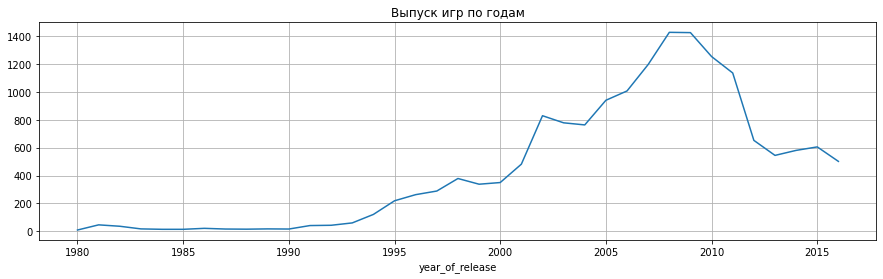

In [15]:
number_per_year = data.pivot_table(index='year_of_release', aggfunc='count')['name']
number_per_year.columns = ['year_of_release','number_of_games']
number_per_year.plot(grid=True, 
                     figsize=(15,4),
                     title='Выпуск игр по годам')

По графику выше видно, что рост количества выпущенных игр шел до 2008 года, затем пошел на спад. Вспоминаем пока кризис 2008 года... <br> 
Для наглядности возьмем данные начиная с 2000 года, так как до этого индустрия игр только развивалась,график ниже

<AxesSubplot:title={'center':'Выпуск игр по годам за 2000-2016 годы'}, xlabel='year_of_release'>

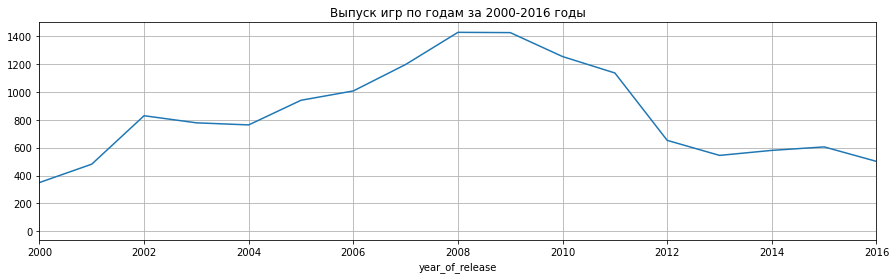

In [16]:
number_per_year.plot(grid=True, 
                     figsize=(15,4), 
                     xlim=(2000,2016),
                     title='Выпуск игр по годам за 2000-2016 годы')

### 3.2 Проанализируем изменение продаж по платформам. <a class="anchor" id="section_3_2"></a>

#### Платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS и PS

In [17]:
sales_per_platform = data.pivot_table(
    index=['platform'], 
    values='total_sales', 
    aggfunc='sum').sort_values(
                        by='total_sales', 
                        ascending=False)
sales_per_platform.head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


#### Распределение продаж по годам для этих платформ:

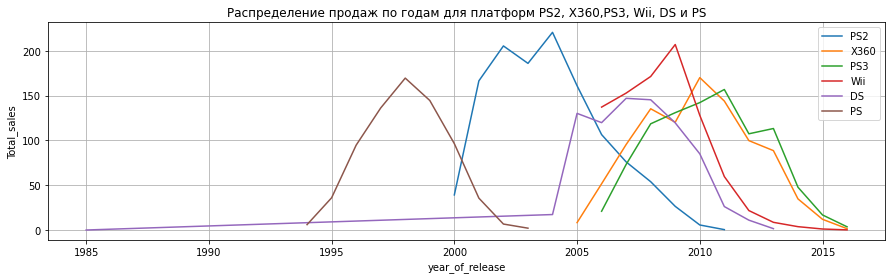

In [18]:
sales_per_platform_per_year = data.pivot_table(
                                          index=['platform', 'year_of_release'],    
                                          values='total_sales', 
                                          aggfunc='sum')
sales_per_platform_per_year

# Построим графики продаж по годам для 6 самых популярных платформ
plt.figure(figsize=(15, 4))

for platform in ['PS2', 'X360','PS3', 'Wii', 'DS' , 'PS']:
    x = sales_per_platform_per_year.loc[platform].index
    y = sales_per_platform_per_year.query('platform == @platform')['total_sales']
    plt.plot(x,y, label=platform)
    plt.legend()
    
    
plt.title('Распределение продаж по годам для платформ PS2, X360,PS3, Wii, DS и PS')    
plt.xlabel('year_of_release') 
plt.ylabel('Total_sales') 
plt.grid() 


    

Видим, что каждые 11лет появляются новые и исчезают старые платформы Актуальным периодом будем считать года: период в 2-3 года с сохранением данных за 2016, т.е. 2014-2016 гг., чтобы не захватить уже отживший тренд.

### 3.3 Найдем какие платформы лидируют по продажам, растут или падают c 2014 по 2016 <a class="anchor" id="section_3_3"></a>

In [19]:
sales_per_platform_3years = data.query(
    'year_of_release >= 2014 and year_of_release <= 2016'
                                ).pivot_table(
                                index=['platform'], 
                                values='total_sales', 
                                aggfunc='sum').sort_values(
                                                by='total_sales', 
                                                ascending=False)
sales_per_platform_3years.head()

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


**Вывод:** <br>
За последние 3 года лидируют по продажам: PS4, XOne и 3DS

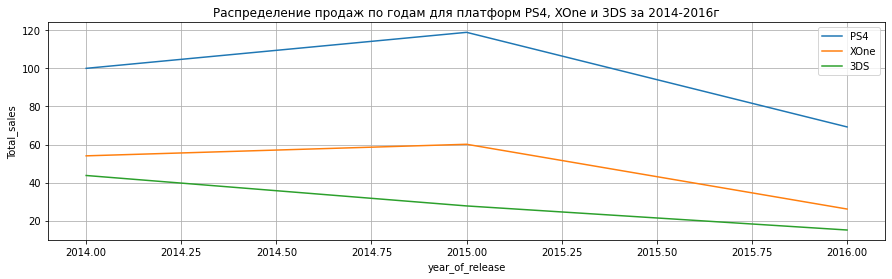

In [20]:
# Посмотрим на тренд продаж по годам для этих платформ
sales_per_platform_11years_per_year = data.query(
    'year_of_release >= 2014 and year_of_release <= 2016 and platform in ["PS4", "XOne", "3DS"]'
                                ).pivot_table(
                                index=['platform', 'year_of_release'], 
                                values='total_sales', 
                                aggfunc='sum')
# Построим графики продаж по годам для 3-х самых популярных платформ
plt.figure(figsize=(15, 4))

for platform in ["PS4", "XOne", "3DS"]:
    x = sales_per_platform_11years_per_year.loc[platform].index
    y = sales_per_platform_11years_per_year.query('platform == @platform')['total_sales']
    plt.plot(x,y, label=platform)
    plt.legend()
    
    
plt.title('Распределение продаж по годам для платформ PS4, XOne и 3DS за 2014-2016г')    
plt.xlabel('year_of_release') 
plt.ylabel('Total_sales') 
plt.grid() 

Из графика выше видим, что продажи игр для PS4 и XOne начиная с 2010 года падают.
Для 3DS падение идет все последние 3 года
Посмотрим, а не появляется ли платформа, для которой характерен рост за последние 4 года

,platform,year_of_release,total_sales
16,PS4,2016,69.25
39,XOne,2016,26.15
3,3DS,2016,15.14
8,PC,2016,5.25
31,WiiU,2016,4.60
23,PSV,2016,4.25
12,PS3,2016,3.60
35,X360,2016,1.52
27,Wii,2016,0.18


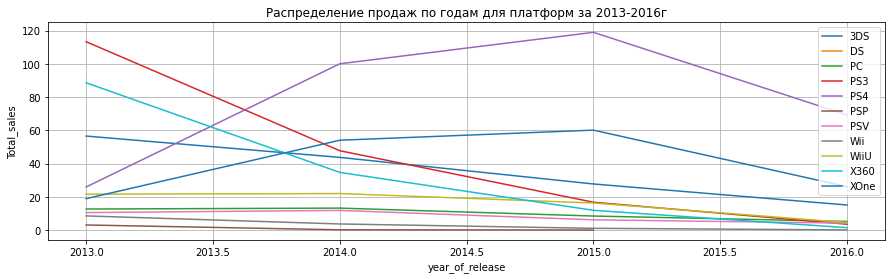

In [21]:
# ПРоделаем аналогичную операцию, только поменяем год на 2013 и 2016, и возьмем выборку для всех платформ.
sales_per_platform_4years_per_year = data.query(
                                        'year_of_release >= 2013 and year_of_release <= 2016'
                                                                        ).pivot_table(
                                                                          index=['platform', 'year_of_release'], 
                                                                          values='total_sales', 
                                                                          aggfunc='sum')
# построим графики
plt.figure(figsize=(15, 4))

for platform in sales_per_platform_4years_per_year.index.levels[0].unique():
    x = sales_per_platform_4years_per_year.loc[platform].index
    y = sales_per_platform_4years_per_year.query('platform == @platform')['total_sales']
    plt.plot(x,y, label=platform)
    plt.legend()
    
    
plt.title('Распределение продаж по годам для платформ за 2013-2016г')    
plt.xlabel('year_of_release') 
plt.ylabel('Total_sales') 
plt.grid() 

sales_per_platform_4years_per_year.reset_index().query(
                                                'year_of_release == 2016').sort_values(
                                                                            by='total_sales', ascending=False)


Можно сделать вывод, что приставки PS4, XOne, 3DS стали замещать приставки предыдущего поколения и являются прибыльным вложением

### 3.4. График «ящик с усами» по глобальным продажам игр в разбивке по платформам <a class="anchor" id="section_3_4"></a>

[array([23.5625,  0.36  ]), array([ 82.055, 140.36 ])]


,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


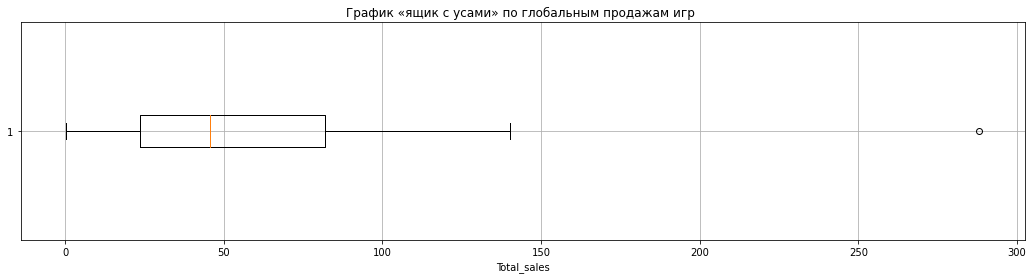

In [22]:
# Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

plt.figure(figsize=(18, 4))
sales_boxplot = plt.boxplot(sales_per_platform_3years, vert=False)
print([item.get_xdata() for item in sales_boxplot['whiskers']]) # выводим лимиты графика для информации

plt.title('График «ящик с усами» по глобальным продажам игр ')    
plt.xlabel('Total_sales') 
plt.grid()
#plt.xticks([0,43,400,931]) # добавляем значения для оси x в соответствии с лимитами гафика
sales_per_platform_3years

(0.0, 1.6)

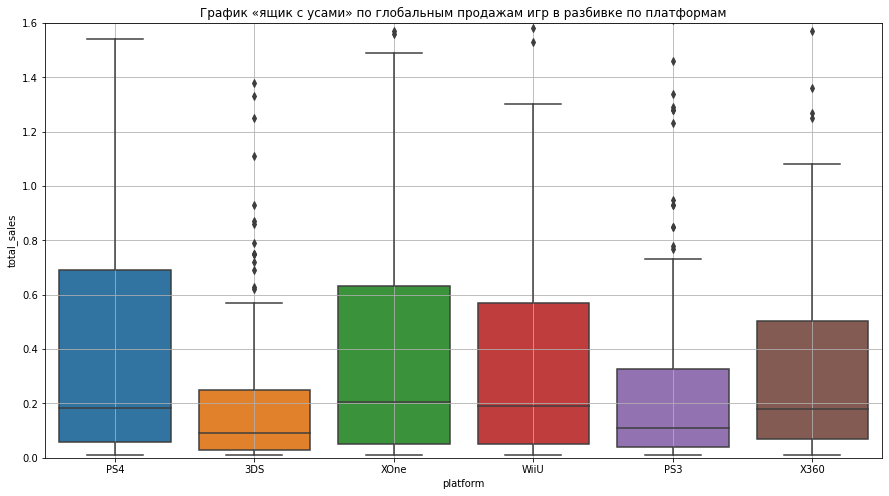

In [23]:
# построим boxplot в разбивке по платформам
plt.figure(figsize=(15, 8))
sns.boxplot(data = data[(data['year_of_release'] >= 2014) &
                        (data['year_of_release'] <= 2016) &
                        (data['platform'].isin(['PS4', 'XOne','3DS', 'PS3', 'X360' , 'WiiU']))], x='platform', y='total_sales')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.grid()
plt.ylim(0,1.6)

**Вывод:** <br>
Из графика видим, что медианы лежат в предлеах 0.1 - 0.2, выше всех у XOne и WiiU (0.2), ниже - у 3DS (0.1).


### 3.5. Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы(PS3)  <a class="anchor" id="section_3_5"></a>

,critic_score,user_score,total_sales
critic_score,1.000000,0.616543,0.432432
user_score,0.616543,1.000000,0.121364
total_sales,0.432432,0.121364,1.000000


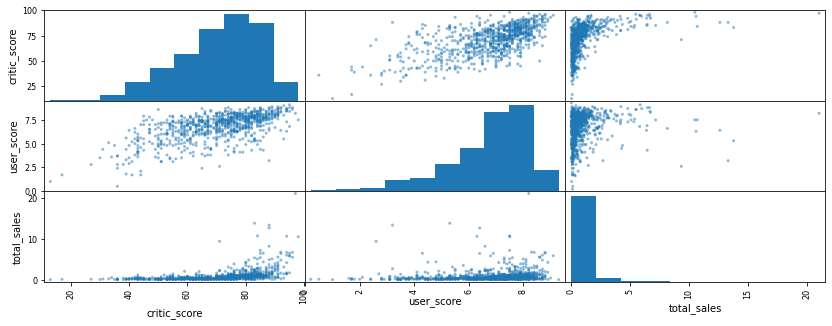

In [24]:
# Сделаем необходимую для исследования выборку
sales_vs_scores = data.query(
        'platform == "PS3"')[  # возьмем данные для PS3 
        ['critic_score', 'user_score', "total_sales"]] 
 

# посторим диаграмму рассеяния
pd.plotting.scatter_matrix(sales_vs_scores, figsize=(14,5))

# Построим матрицу корреляции
sales_vs_scores.corr()


Вывод: Прослеживается прямая зависимость и слабая корреляция между продажами и оценками пользователей/критиков.
Причем корреляция с отзывами критиков более значимая.

### 3.6 Влияние отзывов пользователей и критиков на продажи для всех платформ <a class="anchor" id="section_3_6"></a>

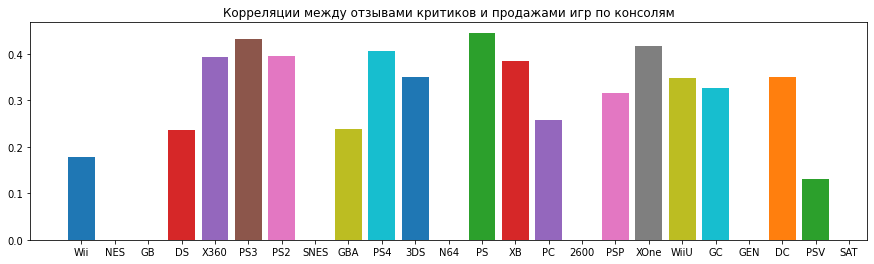

Text(0.5, 1.0, 'Корреляции между отзывами пользователей и продажами игр по консолям')

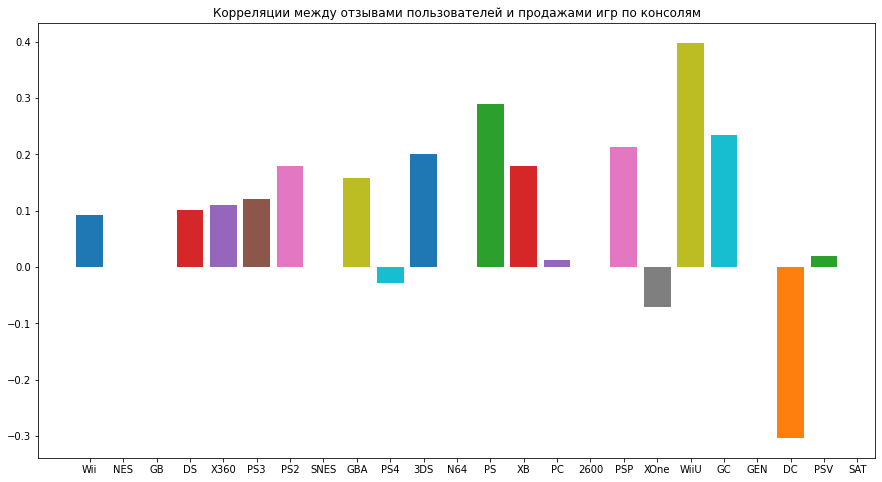

In [25]:
# Проверим корреляции между отзывами и продажами

# 1) Построим столбчатые диаграммы для коррелиций critic_score
plt.figure(figsize=(15, 4))
for platform in data['platform'].unique():
    cr_corr = data.query(   # создадим таблицу с корреляциями
        'platform == @platform')[   
        ['critic_score', 'user_score', "total_sales"]].corr()
    plt.bar(platform, cr_corr.loc['total_sales', 'critic_score']) # critic_score поставили
plt.title('Корреляции между отзывами критиков и продажами игр по консолям') 
plt.show()

# 2) Построим столбчатые диаграммы для коррелиций user_score
plt.figure(figsize=(15, 8))
for platform in data['platform'].unique():
    cr_corr = data.query(   # создадим таблицу с корреляциями
        'platform == @platform')[   
        ['critic_score', 'user_score', "total_sales"]].corr()
    plt.bar(platform, cr_corr.loc['total_sales', 'user_score']) # user_score поставили
plt.title('Корреляции между отзывами пользователей и продажами игр по консолям') 
    
    

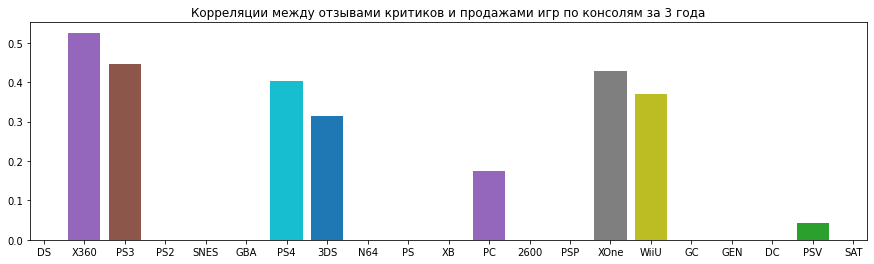

Text(0.5, 1.0, 'Корреляции между отзывами пользователей и продажами игр по консолям за 3 года')

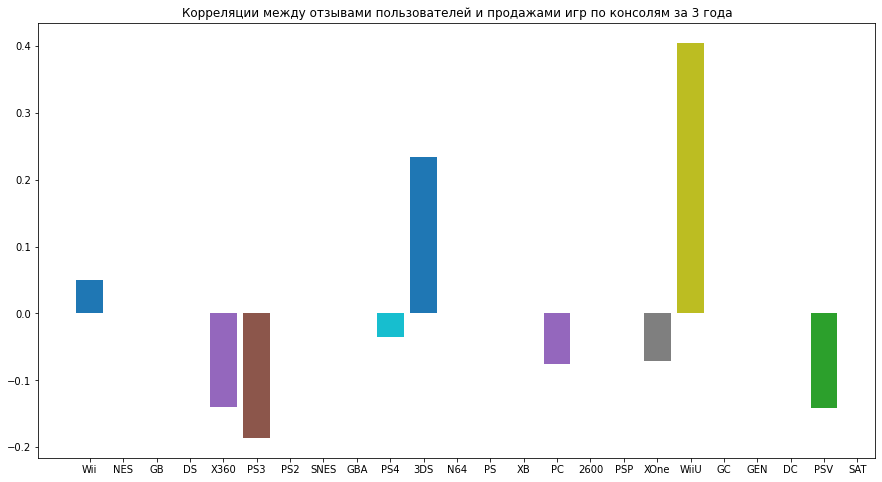

In [26]:
# Проверим корреляции между отзывами и продажами

# 1) Построим столбчатые диаграммы для коррелиций critic_score
plt.figure(figsize=(15, 4))
for platform in data['platform'].unique():
    cr_corr = data.query(   # создадим таблицу с корреляциями
        'platform == @platform and year_of_release >= 2014 and year_of_release <= 2016')[   
        ['critic_score', 'user_score', "total_sales"]].corr()
    plt.bar(platform, cr_corr.loc['total_sales', 'critic_score']) # critic_score поставили
plt.title('Корреляции между отзывами критиков и продажами игр по консолям за 3 года') 
plt.show()

# 2) Построим столбчатые диаграммы для коррелиций user_score
plt.figure(figsize=(15, 8))
for platform in data['platform'].unique():
    cr_corr = data.query(   # создадим таблицу с корреляциями
        'platform == @platform and year_of_release >= 2014 and year_of_release <= 2016')[   
        ['critic_score', 'user_score', "total_sales"]].corr()
    plt.bar(platform, cr_corr.loc['total_sales', 'user_score']) # user_score поставили
plt.title('Корреляции между отзывами пользователей и продажами игр по консолям за 3 года') 

Вывод: Корелляция между отзывами критиков и продажами за 3 года положительная, но не сильная, с максимальными значаниями на уровне 0.4. Выделяется только X360, для нее корреляция средняя, на уровне 0,55.

Корелляция между отзывами пользователей и продажами положительная для WIIU(0,4), Wii(0,05) и 3DS(0.25) и отрицательная для 
остальных, но нигде ни сильная.


### 3.7 Общее распределение игр по жанрам,  продажи <a class="anchor" id="section_3_7"></a>

In [27]:
data.query('year_of_release >= 2014 and year_of_release <= 2016').pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Игры с самыми высокими продажами - это Action, Shooter и Sports  <br>
Игры с самыми низкими продажами - это Puzzle, Strategy и Simulation <br>
Больше всего выделяются Actions и Puzzle, их продажи значительно выше/ниже соответственно

In [28]:
# сравним с медианными продажами, найдем по ним макс и мин
data.query('year_of_release >= 2014 and year_of_release <= 2016').pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


**Вывод:** <br>
Игры с самыми высокими медианными продажами - это Shooter, Sports и Platform
Игры с самыми низкими продажами - это Puzzle, Strategy и Adventrue
Больше всего выделяются Shooters и Adventure, их продажи значительно выше/ниже соответственно

## 4. Составим портрет пользователя каждого региона <a class="anchor" id="chapter4"></a>

### Рассмотри Самые популярные платформы (топ-5). Опишем различия в долях продаж.

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


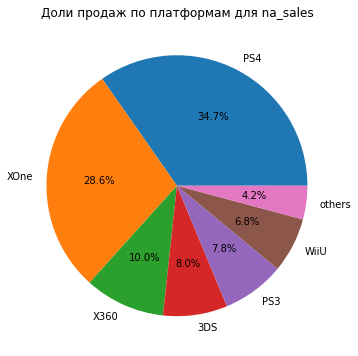

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


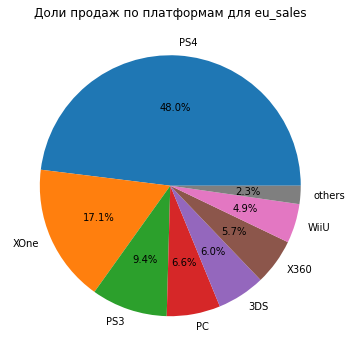

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


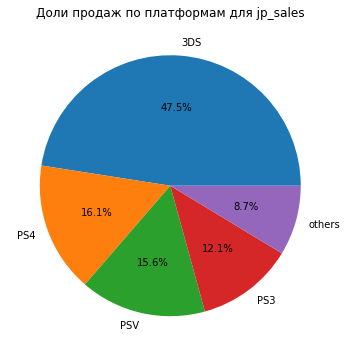

In [29]:
# Построим круговые диаграммы для продаж игр сгруппировав по платформам и по регионам
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']: 
    plt.figure(figsize=(6, 6))
    
    region_platform_sales = data.query('year_of_release >= 2014 and year_of_release <= 2016').pivot_table( # изменил на 3 года
        index='platform', 
        values=region_sales, 
        aggfunc='sum'
                ).sort_values(
                        by=region_sales, 
                        ascending=False).reset_index()
    
    # создадим категорию 'others' и поместим туда все продажи игр по платформам менее 10
    region_platform_sales_with_others =  region_platform_sales[region_platform_sales[region_sales] >= 10
         ].merge(  # объединим таблицу со значениями более 80 с таблицей где 'others' соответствует сумма продаж всех оставшихся
          pd.DataFrame({'platform': ['others'], 
          region_sales : region_platform_sales[region_platform_sales[region_sales] < 10
          ].sum(numeric_only=True)}), #сумируем только цифровые значения(не названия платформ)
          how='outer')
        
    display(region_platform_sales.head())
    
    plt.pie(region_platform_sales_with_others[region_sales], 
            labels=region_platform_sales_with_others['platform'], # добавляем названия платформ на диаграмму
            autopct='%1.1f%%') # добавляем проценты на диаграмму
     
    plt.title(f'Доли продаж по платформам для {region_sales}')
    plt.show()


**Вывод:** <br>
-из диаграмм видно, что в Европе и Америке платформа PS4 и XOne на пике популярности. В то время как в Японии XOne совершенно не популярна, но большой популярностью пользуется 3DS с продажами игр, которые составляют почти половину всего рынка. Кроме того, японцы любят играть в портативную PSV c 15% продаж игр. <br>
-во всех регионах в пятерки лидеров PS3, консоль предыдущего поколения <br>

### Самые популярные жанры (топ-5). 

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


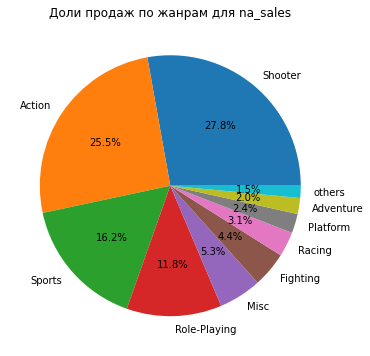

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


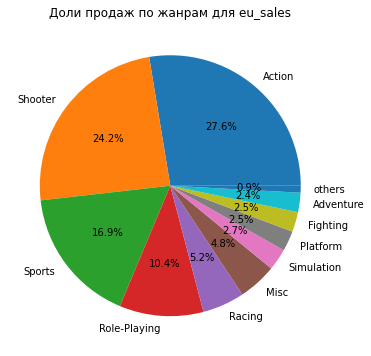

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


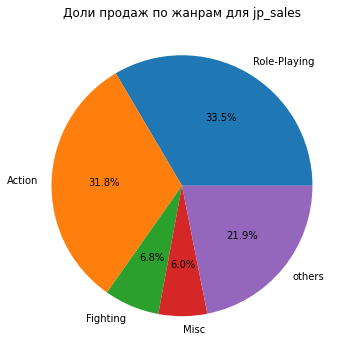

In [30]:
# Построим круговые диаграммы для продаж игр сгруппировав по жанрам и по регионам
# Используем как шаблон предыдущий код, удалив категорию others, так как жанров не так много 
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']: 
    plt.figure(figsize=(6, 6))
    
    region_genre_sales = data.query('year_of_release >= 2014 and year_of_release <= 2016').pivot_table( # изменим на genre_sales
        index='genre',   # изменим на genre
        values=region_sales, 
        aggfunc='sum'
                ).sort_values(
                        by=region_sales, 
                        ascending=False).reset_index()
        # создадим категорию 'others' и поместим туда все продажи игр по жанрам менее 5
    region_genre_sales_with_others =  region_genre_sales[region_genre_sales[region_sales] >= 5
         ].merge(  # объединим таблицу со значениями более 80 с таблицей где 'others' соответствует сумма продаж всех оставшихся
          pd.DataFrame({'genre': ['others'], 
          region_sales : region_genre_sales[region_genre_sales[region_sales] < 5
          ].sum(numeric_only=True)}), #сумируем только цифровые значения(не названия платформ)
          how='outer')
    
    
        
    display(region_genre_sales.head())  # изменим на genre
    
    plt.pie(region_genre_sales_with_others[region_sales],  # изменим на genre
            labels=region_genre_sales_with_others['genre'], # добавляем названия genre на диаграмму   # изменим на genre
            autopct='%1.1f%%') # добавляем проценты на диаграмму
     
    plt.title(f'Доли продаж по жанрам для {region_sales}')
    plt.show()

**Вывод:** <br>
популярные жанры в Америке и в Европе похожи, лидерами являются Action, Sports и Shooters. В то время как в Японии, жанр ролевых игр на первом месте, а 2 и 3 место разделили Action и Fighting. Cпорт в Японии не популярен.


### Проанализируем влияет ли рейтинг ESRB на продажи в отдельном регионе

In [31]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

,rating,na_sales
0,M,96.42
1,unknown,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


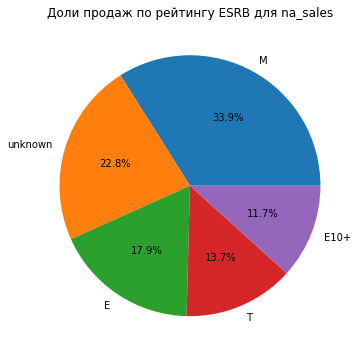

,rating,eu_sales
0,M,93.44
1,unknown,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


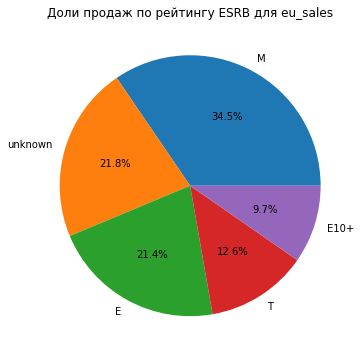

,rating,jp_sales
0,unknown,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


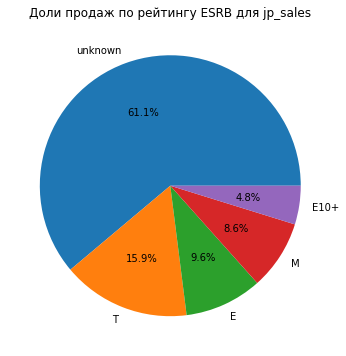

In [32]:
# Построим круговые диаграммы для продаж игр сгруппировав по рейтингу и по регионам
# Используем как шаблон предыдущий код, удалив категорию others, так как жанров не так много 
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']: 
    plt.figure(figsize=(6, 6))
    
    region_rating_sales = data.query('year_of_release >= 2014 and year_of_release <= 2016').pivot_table( # изменим на rating_sales
        index='rating',   # изменим на rating
        values=region_sales, 
        aggfunc='sum'
                ).sort_values(
                        by=region_sales, 
                        ascending=False).reset_index()
    
  
        
    display(region_rating_sales.head())  # изменим на rating
    
    plt.pie(region_rating_sales[region_sales],  # изменим на rating
            labels=region_rating_sales['rating'], # добавляем названия rating на диаграмму   # изменим на rating
            autopct='%1.1f%%') # добавляем проценты на диаграмму
     
    plt.title(f'Доли продаж по рейтингу ESRB для {region_sales}')
    plt.show()

Вывод: игры без рейтинга -  самые продаваемые в Японии и на втором месте в Америке и Европе. Возможно это игры, выпущенные не в Америке, где работает рейтинговое агенство. Для рейтинга T для подростков занчение на уровне 13-15% во всех регионах.
В Японии игры категории M(более 17 лет) составляют всего около 9%, тогда как в Америке и Европе эта категория в лидерах и составляют треть всех продаж. Видимо производители игр часто ориентируются именно на эту группу.


## 5 Проверка гипотез <a class="anchor" id="chapter5"></a>

### Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a class="anchor" id="section_5_1"></a>

Примем <br>
H_0: Пользовательские рейтинги платформы Xbox One =  пользовательские рейтинги платформы PC  <br>
H_a: Пользовательские рейтинги платформы Xbox One !=  пользовательские рейтинги платформы PC  <br>
alpha = 0.05

Проверка гипотез начинается с формулировки нулевой гипотезы H₀, то что рейтинги равны.
Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀. В нашем случае такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны. <br>

Теперь остается только на основе данных сделать выбор: отклонить нулевую гипотезу в пользу альтернативной или нет.
Для этого нужно посчитать вероятность получить наблюдаемое на выборке значение при условии, что нулевая гипотеза верна. Если вероятность большая — отвергать нулевую гипотезу вряд ли стоит. 

In [34]:
data_3_year = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

results = st.ttest_ind(
    data_3_year[(data_3_year['platform'] == 'XOne') & (data_3_year['user_score'].isnull() == False)]['user_score'],
    data_3_year[(data_3_year['platform'] == 'PC') & (data_3_year['user_score'].isnull() == False)]['user_score'],
    equal_var = False)

alpha = 0.05 # значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.13130164268727834
Не получилось отвергнуть нулевую гипотезу


Так как расчитанное pvalue больше, чем заданное alpha, то нулевую гипотезу не можем отклонить; что значит, что вероятность, что рейтинги платформ равны выше пороговое значения alpha. <br>

### Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные. <a class="anchor" id="section_5_2"></a>

Примем <br>
H_0: Пользовательские рейтинги жанров Action =  пользовательские рейтинги жанров Sports  <br>
H_a: Пользовательские рейтинги жанров Action !=  пользовательские рейтинги жанров Sports  <br>
alpha = 0.05

Проверка гипотез начинается с формулировки нулевой гипотезы H₀, то что рейтинги равны.
Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀. В нашем случае такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны. <br>

Теперь остается только на основе данных сделать выбор: отклонить нулевую гипотезу в пользу альтернативной или нет.
Для этого нужно посчитать вероятность получить наблюдаемое на выборке значение при условии, что нулевая гипотеза верна. Если вероятность большая — отвергать нулевую гипотезу вряд ли стоит. 

In [35]:
data_3_year = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

results = st.ttest_ind(
    data_3_year[(data_3_year['genre'] == 'Action') & (data_3_year['user_score'].isnull() == False)]['user_score'],
    data_3_year[(data_3_year['genre'] == 'Sports') & (data_3_year['user_score'].isnull() == False)]['user_score'],
    equal_var = False)

alpha = 0.05 # значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.3080710852425688e-13
Отвергаем нулевую гипотезу


Так как расчитанное pvalue меньше, чем заданное alpha, то гипотезу можем отклонить, то есть вероятность, что рейтинги жанров равны ниже, чем наше пороговое значение alpha. <br>
Но! <br>
Гипотеза изначально звучит как рейтинги 'не равны', и соответственно эту гипотезу мы не отвергаем, так как она противоположная взятой нами в исследовании. 

## Общий вывод <a class="anchor" id="chapter6"></a>

В проекте мы выявили определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

- рост количества выпущенных игр шел до 2008 года, затем пошел на спад
- каждые 11лет появляются новые и исчезают старые платформы
- Платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS и PS
- За последние 3 года лидируют по продажам: PS4, XOne и 3DS
- приставки PS4, XOne, 3DS стали замещать приставки предыдущего поколения и являются прибыльным вложением
- Прослеживается прямая зависимость и слабая корреляция между продажами и оценками пользователей/критиков. Причем корреляция с отзывами критиков более значимая.
- Корелляция между отзывами критиков и продажами за 3 года положительная, но не сильная, с максимальными значаниями на уровне 0.4. Выделяется только X360, для нее корреляция средняя, на уровне 0,55.
- Корелляция между отзывами пользователей и продажами положительная для WIIU(0,4), Wii(0,05) и 3DS(0.25) и отрицательная для остальных, но нигде ни сильная.

- Игры с самыми высокими продажами - это Action, Shooter и Sports 
- Игры с самыми низкими продажами - это Puzzle, Strategy и Simulation 
- Больше всего выделяются Actions и Puzzle, их продажи значительно выше/ниже соответственно

- Игры с самыми высокими медианными продажами - это Shooter, Sports и Platform Игры с самыми низкими продажами - это Puzzle, Strategy и Adventrue Больше всего выделяются Shooters и Adventure, их продажи значительно выше/ниже соответственно

- в Европе и Америке платформа PS4 и XOne на пике популярности. В то время как в Японии XOne совершенно не популярна, но большой популярностью пользуется 3DS с продажами игр, которые составляют почти половину всего рынка. Кроме того, японцы любят играть в портативную PSV c 15% продаж игр. 
- во всех регионах в пятерки лидеров PS3, консоль предыдущего поколения
- популярные жанры в Америке и в Европе похожи, лидерами являются Action, Sports и Shooters. В то время как в Японии, жанр ролевых игр на первом месте, а 2 и 3 место разделили Action и Fighting. Cпорт в Японии не популярен.

- игры без рейтинга - самые продаваемые в Японии и на втором месте в Америке и Европе. Возможно это игры, выпущенные не в Америке, где работает рейтинговое агенство. Для рейтинга T для подростков занчение на уровне 13-15% во всех регионах. В Японии игры категории M(более 17 лет) составляют всего около 9%, тогда как в Америке и Европе эта категория в лидерах и составляют треть всех продаж. Видимо производители игр часто ориентируются именно на эту группу.
- Не получилось отвергнуть гипотезу, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Не получилось отвергнуть гипотезу , что  Средние пользовательские рейтинги жанров Action и Sports  разные




